In [40]:
# ==============================
# Standard Library Imports
# ==============================
from enum import Enum
import random

# ==============================
# Third-party Library Imports
# ==============================
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.ticker import MultipleLocator
import numpy as np  # Original numpy
import pennylane as qml
import scipy as sp
from autograd import grad, jacobian
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

# Pennylane numpy
from pennylane import numpy as pnp 

In [41]:
# ==============================
# Setup for Quantum Computations
# ==============================

# PennyLane settings
dev = qml.device('default.mixed', wires=2)

# Define Hamiltonian for quantum computations
coeffs = [-0.5]
obs = [qml.PauliZ(0) @ qml.PauliZ(1)]
hamiltonian = qml.Hamiltonian(coeffs, obs)

In [42]:
@qml.qnode(dev)
def bell_state():
    # Bell state for 2-qubit
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    
    return qml.density_matrix(wires=[0, 1])
    
@qml.qnode(dev)
def interaciton(phi):
    # Get density matrix from the bell_state
    density_matrix = bell_state()
    qml.QubitDensityMatrix(density_matrix, wires=[0, 1])
    
    # Time Evolution with z-z interaction
    qml.ApproxTimeEvolution(hamiltonian, phi, 1)
    
    return qml.density_matrix(wires=[0, 1])

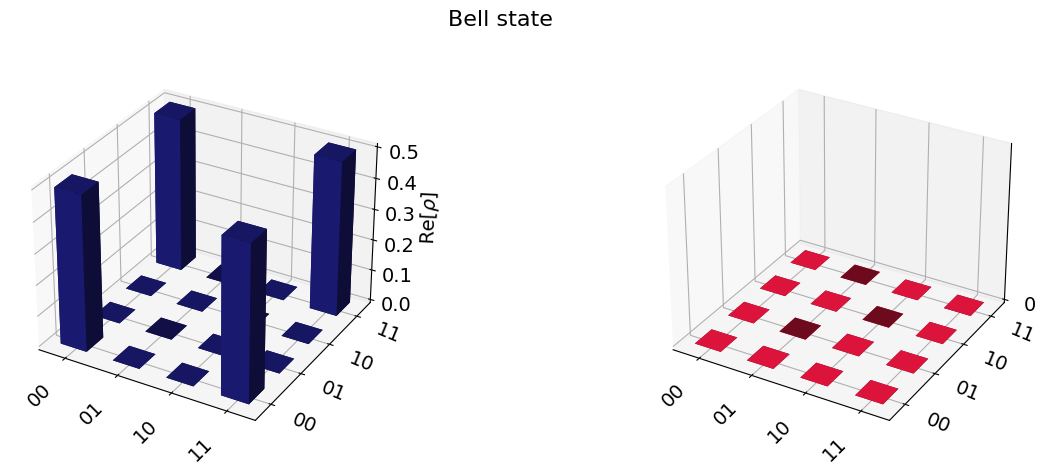

In [43]:
plot_state_city(bell_state(), color=['midnightblue', 'crimson'], title = "Bell state")

In [44]:
def classical_fisher_information(phi):
    # Convert phi to pennylane numpy array(gradient support)
    phi_current = pnp.array([phi])
    
    cfi_calculation = qml.qinfo.classical_fisher(interaciton)(phi_current[0])
    
    return cfi_calculation

In [45]:
PHI = np.arange(0, 3*np.pi, 1e-2)

Data = np.zeros((len(PHI), 2))
Data[:,0] = PHI.squeeze()

for phi_idx, phi in enumerate(PHI):
    Data[phi_idx, 1] = classical_fisher_information(phi)
    
# Data[:,1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


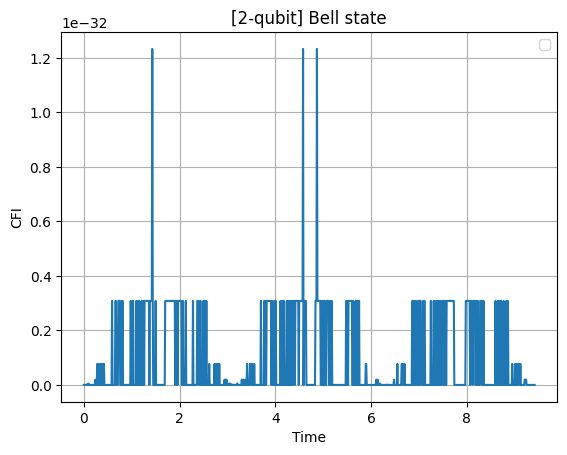

In [46]:
plt.plot(Data[:, 0], Data[:,1])

plt.title(f'[2-qubit] Bell state')
plt.xlabel('Time')
plt.ylabel('CFI')
plt.grid()
plt.legend()